Autores: 
- Adauto Donizetti de Paula
- Aline Regina de Oliveira
- Antonio Luciano Lopes Uliana

# Introdução

Recentemente, a quantidade de dados produzidos dentro de empresas, universidades, comércio e no mercado tem ganhado grande relevância, tanto pela quantidade de dados produzidos devido ao fácil compartilhamento, envio e recebimento, quanto pela necessidade de entender esses dados e transformá-los em informação útil para apoio na tomada de decisão dentro dessas entidades. Nesse processo de compreensão dos dados, existem téncias denonminadas mineração de dados, que visam explorar grandes quantidades de dados com o intuito de encontrar padrões relevantes e consistentes no relacionamento entre os atributos (basicamente, colunas de tabelas) dessas bases de dados. 

Uma das primeiras técnicas desenvolvidas nesse sentido foi o  KDD (em inglês, *Knowledge Discovery in Database*), desenvolvido durante o final da década de 1980. A extração de conhecimento a partir de uma base de dados é dividida em fases: coleta de dados -> tratamento dos dados -> resultado final (transformação dos dados em informações e posteriormente em conhecimento).

O processo KDD foi constituído visando automatizar o processo de extração de conhecimento a partir de uma grande base de dados. É um processo iterativo, isto é, cada etapa pode ser repetida até que se tenham os resultados satisfatórios. 

As etapas do KDD, segundo Fayyad et al (1996) são as seguintes:

- Seleção: é a etapa de agrupamento dos dados de modo organizado. É uma etapa muito importante, pois é nela que serão decididos quais os conjuntos de dados que serão relevantes para que sejam obtidos resultados com informações uteis.
- 	Pré-processamento: neste momento os dados passam por uma adequação. Ao final do processo, devem possuir o formato correto e não apresentar duplicidade, entre outras características. Consiste numa a limpeza dos dados e seleção de atributos. Nesta etapa, informações ausentes, errôneas ou inconsistentes nas bases de dados devem ser corrigidas de forma a não comprometer a qualidade dos modelos de conhecimento a serem extraídos ao final do processo de KDD.
-	Transformação: é a etapa de armazenamento dos dados de forma a facilitar o uso das técnicas de Data Mining. Esta etapa analisa os dados obtidos na etapa anterior e os reorganiza de uma forma especifica para que possam ser interpretados na etapa seguinte.
-	Mineração de Dados: é a principal atividade do processo de descoberta do conhecimento. Nesta fase  são aplicados algoritmos de descoberta de padrões. A mineração faz com que meros dados sejam transformados em informações.
-	Interpretação e avaliação: esta fase consiste em interpretar os dados gerados e verificar se possuem alguma validade para o problema proposto. Esta é a fase na qual as regras indicadas pelo processo anterior serão interpretadas e avaliadas. Após a interpretação poderão surgir padrões, relacionamentos e descoberta de novos fatos, que podem ser utilizados para pesquisas, otimização e outros.

Neste trabalho, pode-se entender as fases do KDD para uma base de dados na qual existe uma série de atributos de análise de imagens de células na região do câncer feitos com ultrassonografia para prever se um câncer de mama é benigno ou malígno. Basicamente, os tumores benignos são constituídos por células bem semelhantes às que os originaram e não possuem a capacidade de provocar metástases. Já os malignos são agressivos e possuem a capacidade de infiltrar outros órgãos.
Fonte: https://www.einstein.br/noticias/noticia/cancer-benigno-maligno

Após a extração dos dados da plataforma Kaggle (www.kaggle.com) foi realizado um pré-processamento para garantir que os dados lidos e interpretados sejam relevantes para o processo de extração de conhecimento. Após isso, foi implementada a transformação dos dados em si, através do algoritmo KNN. Por fim, foram feitas as previsões a partir de novos dados, isto é, após o aprendizado realizado pelo algoritmo KNN sobre a base de dados, novas entradas de dados buscaram classificar se uma nova entrada de fotos de células seria um câncer beingno ou maligno, baseado no aprendizado anterior. Foi traçada uma avaliação para essas previsões, de modo a se obter uma acurácia e concluir se o modelo contruído é bom ou ruim nas suas previsões.


Cada classificação foi calculada a partir de uma imagens digitalizadas de uma região de células afetadas nas glândulas mamárias. Essas imagens descrevem características dos núcleos celulares presentes e das células.

As seguintes seções desse trabalho se referem às etapas do KDD e a conclusão do trabalho:
- Seleção dos dados, 
- Pré-processamento , 
- Transformação, 
- Mineração de Dados, 
- Avaliação (do modelo),
- Conclusão


# Seleção dos Dados

A fase de seleção dos dados é a primeira no processo de descoberta do conhecimento nas atividades de *machine learning* e ciências dos dados.
Nesta fase é escolhido o conjunto de dados contendo todas as possíveis variáveis, também chamadas de características ou atributos, que farão parte da análise.
A etapa de seleção possui impacto significante sobre a qualidade do resultado do processo.

Os dados que iremos utilizar pertencem a uma base de dados sobre diagnóstico de câncer de mama disponível na plataforma Kaggle . (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [1]:
# Carregar as bibliotecas necessárias: 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
import sklearn.metrics


# Carregar a base de dados:
rout_path = "../input/data.csv"
dados = pd.read_csv(rout_path)

# Pré-processamento 

A etapa de pre-processamento é crucial no processo, pois a qualidade dos dados vai determinar a eficiência dos algoritmos de mineração.
Nesta etapa são realizadas tarefas que eliminam dados redundantes e inconsistentes, recuperem dados incompletos e avaliam possíveis dados discrepantes ao conjunto (*outliers*). 
Nesta etapa também são utilizados métodos de redução ou transformação para diminuir o número
de variáveis envolvidas no processo, visando com isto melhorar o desempenho do algoritmo que será usado na análise dos dados.



In [2]:
# Mostrar detalhes dos 5 primeiros registros da base:

dados.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


A seguir, a classe objetivo, no caso a coluna "diagnosis", é separada dos demais atributos, que são efetivamente os dados que serão analisados

Também são removidas as colunas com informações que não são relevantes: 'id' (número de identificação do registro) e 'Unnamed: 32' (coluna com valor faltante para todos os registros).

Nos parâmetros exibidos a seguir, é notória a diferença entre os valores absolutos de alguns atributos, como por exemplo o valor da área e o valor da concavidade. Desse modo, para algumas exibições gráficas nas seções adiante, será necessária a normalização dos dados.

In [3]:
# Colocar no vetor Y os valores da classe objetivo

Y = dados.diagnosis                         


# Fazer a remoção das colunas desnecessárias

list = ['Unnamed: 32','id','diagnosis']        # lista com as colunas a serem removidas
X = dados.drop(list,axis = 1 )          
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualização


Para visualizar os dados será utilizada a biblioteca seaborn para plotar graficos úteis para compreensão das informações a respeito dos atributos da base de dados.


### Número total de registros para cada classe 




Quantidade de Benignos:  357
Quantidade de Malignos:  212


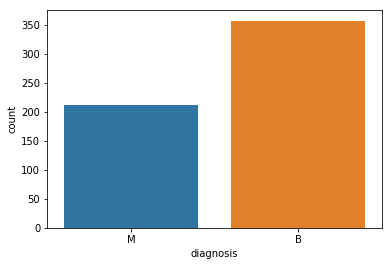

In [4]:
ax = sns.countplot(Y,label="Quantidade")       # M = 212, B = 357
B, M = Y.value_counts()
print('Quantidade de Benignos: ',B)
print('Quantidade de Malignos: ',M)

### Ver como os dados se comportam

Para uma melhor compreensão dos dados podemos observar como eles se comportam. 
Após a execução a primeira tabela a seguir mostrará os seguintes dados estatísticos sobre os dados:
soma, média, desvio padrão, valor 25% 50%(mediana) e 75% , máximo e mínimo .

In [5]:
# mostra soma, média , desvio padrão, min, max, valor dos 25%, 50%(mediana) e 75%

X.describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Explicação dos atributos

Os atributos são divididos em três grupos: Mean, SE e Worst.

> Mean: média de todas as células;

> SE: *Standard Error* (erro padrão de todas as células);

> Worst: média dos três piores valores medidos das células. Na verdade, é considerado "pior" porque são medidas indicativas de células não saudáveis; na realidade o "pior" significa os maiores valores medidos para raio, perímetro, textura etc.

Cada grupo tem 10 atributos: 
- radius (raio da célula)
- texture (textura da célula - medida pelo desvio padrão de escalas de cinza, que ajudam a indicar se a célula é saudável ou não)
-	perimeter (perímetro)
-	area (área)
-	smoothness (variação local em comprimentos de raio)
- compactness (campactude = perimetro²/area - 1)
- concavity (gravidade das porções côncavas das células)
- concave points (número de porções côncavas no contorno da célula),
- symmetry (simetria) 
- fractal_dimension (dimensão fractal). 






## **Mapa de calor para os dados limpos**

No mapa de calor é feita uma regressão linear de todos os atributos combinados 2 a 2, e o valor que aparece nas células do mapa de calor são os coeficientes angulares de um atributo em relação ao outro, resultante da regressão linear. 
Para exemplificar, o valor que aparece nas células da diagonal principal, é o coeficiente angular de um atributo em relação a ele mesmo, logo o valor é 1. Se o coefiente angular é positivo, significa que quando o atributo do eixo horizontal cresce, o atributo do eixo vertical também cresce com taxa de variação igual ao valor do coeficiente angular. Se o coeficiente angular é negativo,  significa que quando o atributo do eixo horizontal cresce, o do eixo vertical  decresce com taxa de variação igual ao módulo do coeficiente angular. Por fim, caso o coeficiente seja zero, significa que as duas variáveis não dependem linearmente uma da outra. Nesses casos pode existir uma dependência não-linear, que seria necessário investigá-la por outros meios. 





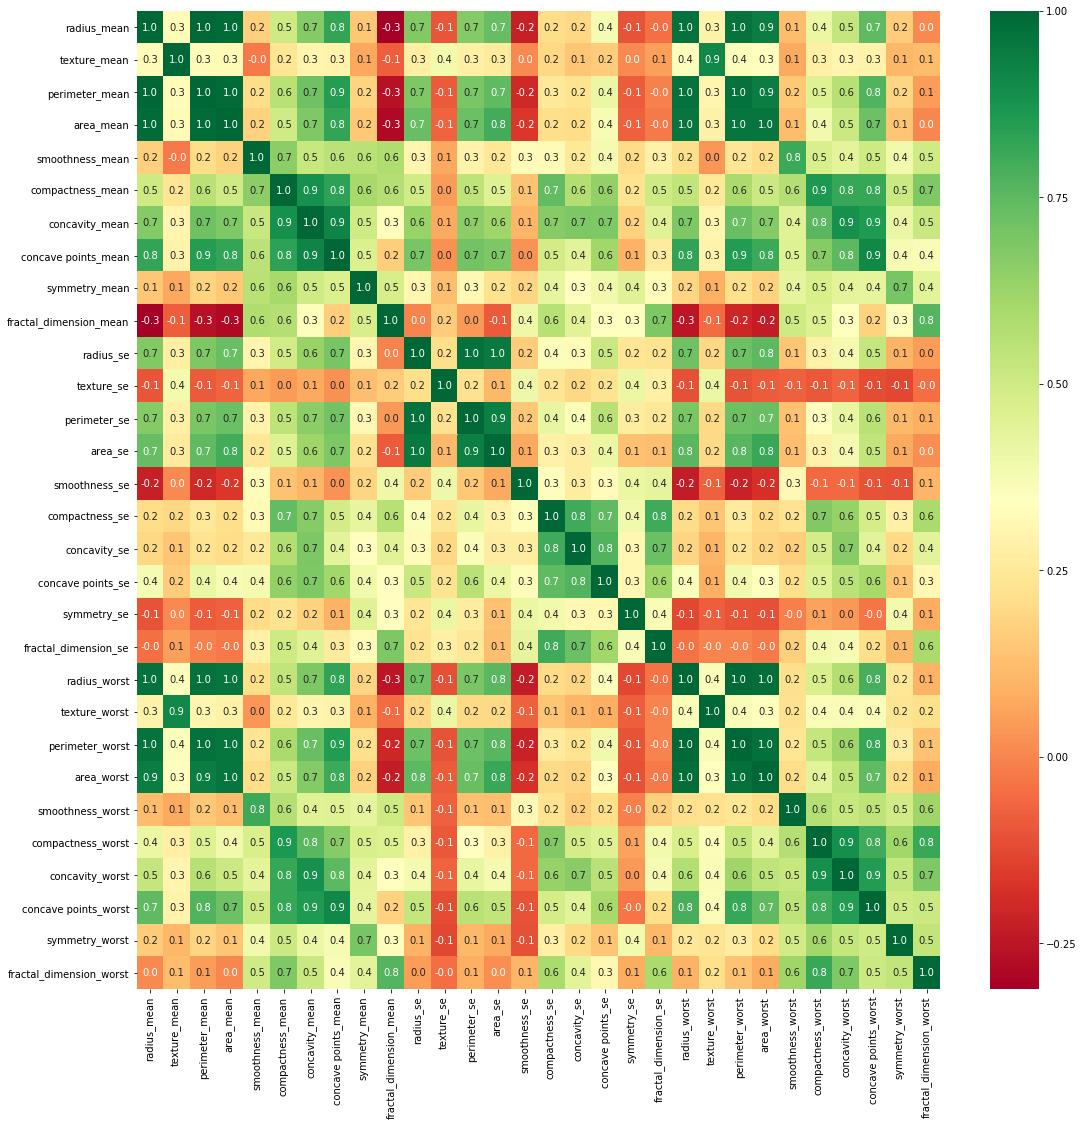

In [6]:
# Mostrar mapa de calor 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

Para melhor visualizar o mapa de calor, foram separados os grupos Mean, SE e Worst.

A ideia do heatmap aqui é entender como os atributos se relacionam. Caso tenham grande correlação, é um indicativo de multicolinearidade, que pode levar a resultados distorcidos. Existem várias maneiras de lidar com esse problema, como por exemplo o uso de PCA (*Principal Component Analysis*). Contudo, a abordagem utilizada será mais simples, que é a de simplesmente escolher um dos atributos para manter na base e eliminar os outros que tenham alta correlação com ele. 

PS: algoritmos que usam ávores de decisão evitam problemas de multicolinearidade naturalmente em sua implementação.

A decisão de implementação foi de deletar os atributos com correlação maior ou igual a 0.9.

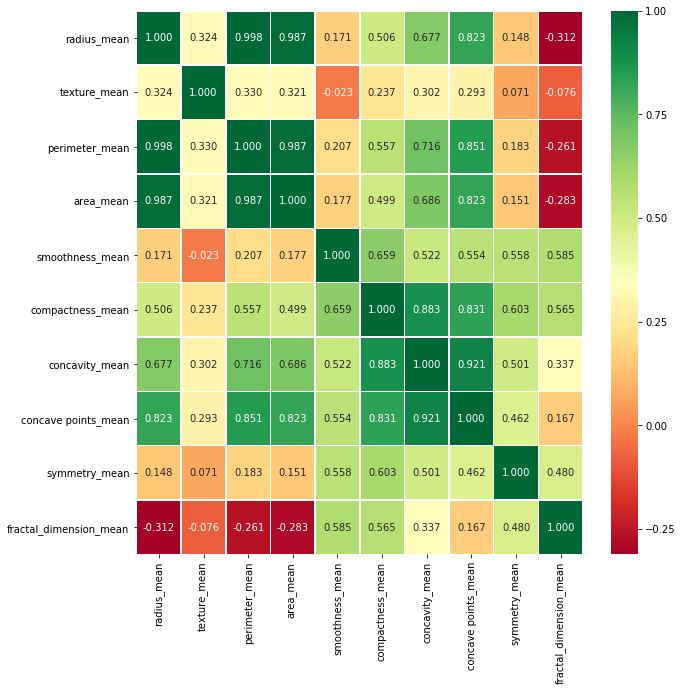

In [7]:
droplist_se_worst = ['radius_se', 	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se', 'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

somente_mean = X.drop(droplist_se_worst, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(somente_mean.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='RdYlGn')

- Os atributos radius_mean, perimeter_mean e	area_mean possuem correlação acima de 0.9, então iremos remover os atributos radius_mean e perimeter_mean (escolha arbitrária)
- Os atributos concavity_mean e concave points_mean possuem correlação acima de 0.9, então iremos remover o atributo concavity_mean (escolha arbitrária)

Portanto, nesse primeiro grupo, os atributos que continuarão serão: area_mean, texture_mean, smoothness_mean, compactness_mean, concave points_mean, symmetry_mean e fractal_dimension_mean



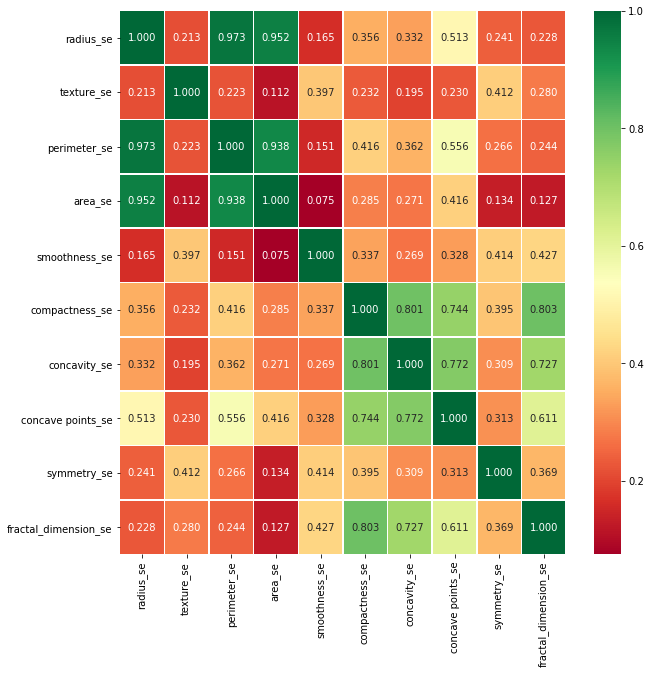

In [8]:
droplist_mean_worst = ['radius_mean', 'texture_mean',	'perimeter_mean',	'area_mean', 	'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean', 'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

somente_se = X.drop(droplist_mean_worst, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(somente_se.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='RdYlGn')

- Os atributos radius_se, perimeter_se e  area_se possuem correlação acima de 0.9, então iremos remover os atributos perímetro e raio (escolha arbitrária)

Portanto, nesse segundo grupo, os atributos que continuarão serão: area_se, texture_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se e fractal_dimension_se

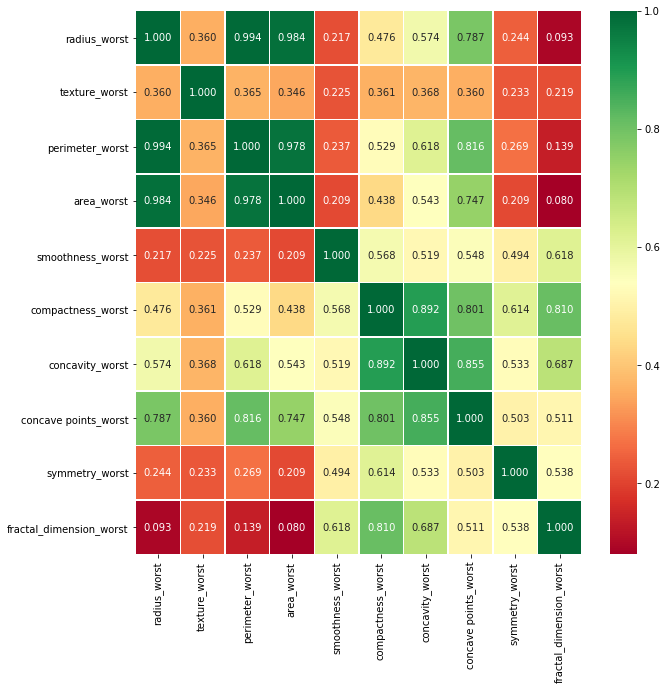

In [9]:
droplist_mean_se = ['radius_mean', 'texture_mean',	'perimeter_mean',	'area_mean', 	'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean', 'radius_se', 	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se']

somente_worst = X.drop(droplist_mean_se, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))


sns.heatmap(somente_worst.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='RdYlGn')

- Os atributos radius_worst, perimeter_worst e  area_worst possuem correlação acima de 0.9, então iremos remover os atributos perímetro e raio (escolha arbitrária)

Portanto, nesse primeiro terceiro, os atributos que continuarão serão: area_worst, texture_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst e fractal_dimension_worst

## **Plotagem de Violino**

A plotagem de violino nos mostra a distribuição dos dados de acordo com cada classe e cada atributo. Para cada atributo à esquerda do eixo é apresentada a distribuição dos dados para a classe Maligno,  e à direita a distribuição para a classe Benigno.

Através da observação da plotagem de violino podemos inferir que os atributos area_mean , concave points_mean, area_se, area_worst, concavity_worst e concave points_worst são bons atributos para a separação das classes, visto que a distribuição dos dados das classes é bem distinto. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

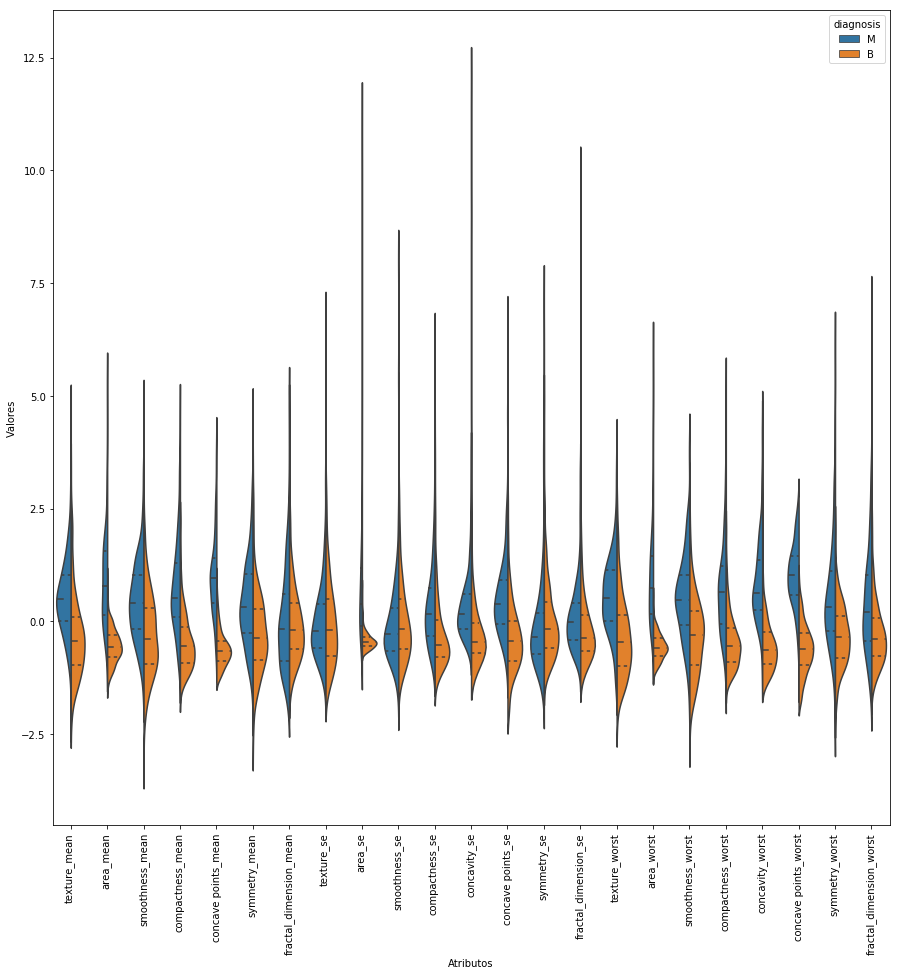

In [10]:
droplist_final = ['radius_mean', 	'perimeter_mean',	'concavity_mean',	'radius_se', 	'perimeter_se',	'radius_worst',	'perimeter_worst']


data_dia = Y
data = X.drop(droplist_final, axis = 1)                     #retirada de atributos 
data_n_2 = (data - data.mean()) / (data.std())              # normalização
data = pd.concat([Y,data_n_2],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="Atributos",
                    value_name='Valores')
plt.figure(figsize=(15,15))
sns.violinplot(x="Atributos", y="Valores", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

## **Gráfico de pares de atributos**

Os gráficos abaixo mostram as correlações entre os atributos (*mean, se* e *worst*) e as classes. 

Observando os gráficos da diagonal principal (histogramas referente à distribuição dos dados de acordo com o atributo em si) podemos inferir que os atributos area_mean ,  concave points_mean , area_se , concave points_worst e area_worst são bons atributos para a separação das classes, visto que a distribuição dos dados das classes é bem distinto.


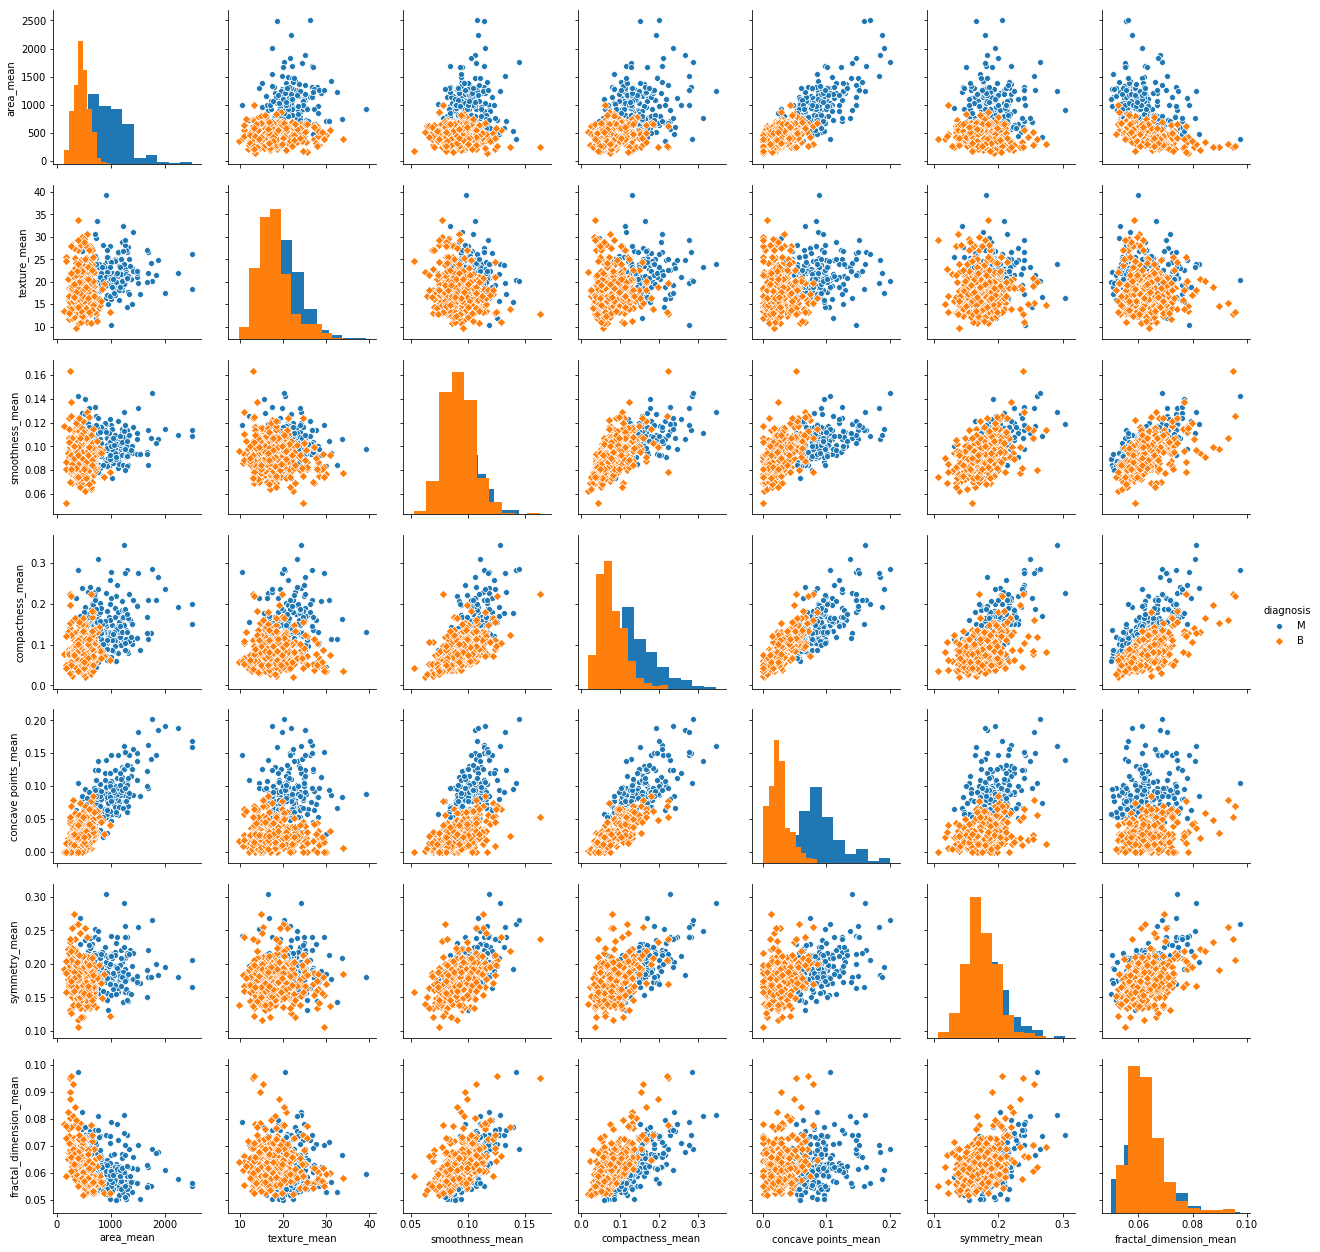

In [11]:
# Mostrar correlação entre classes e atributos 'mean'
sns.pairplot(dados, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"] ) 
plt.show()

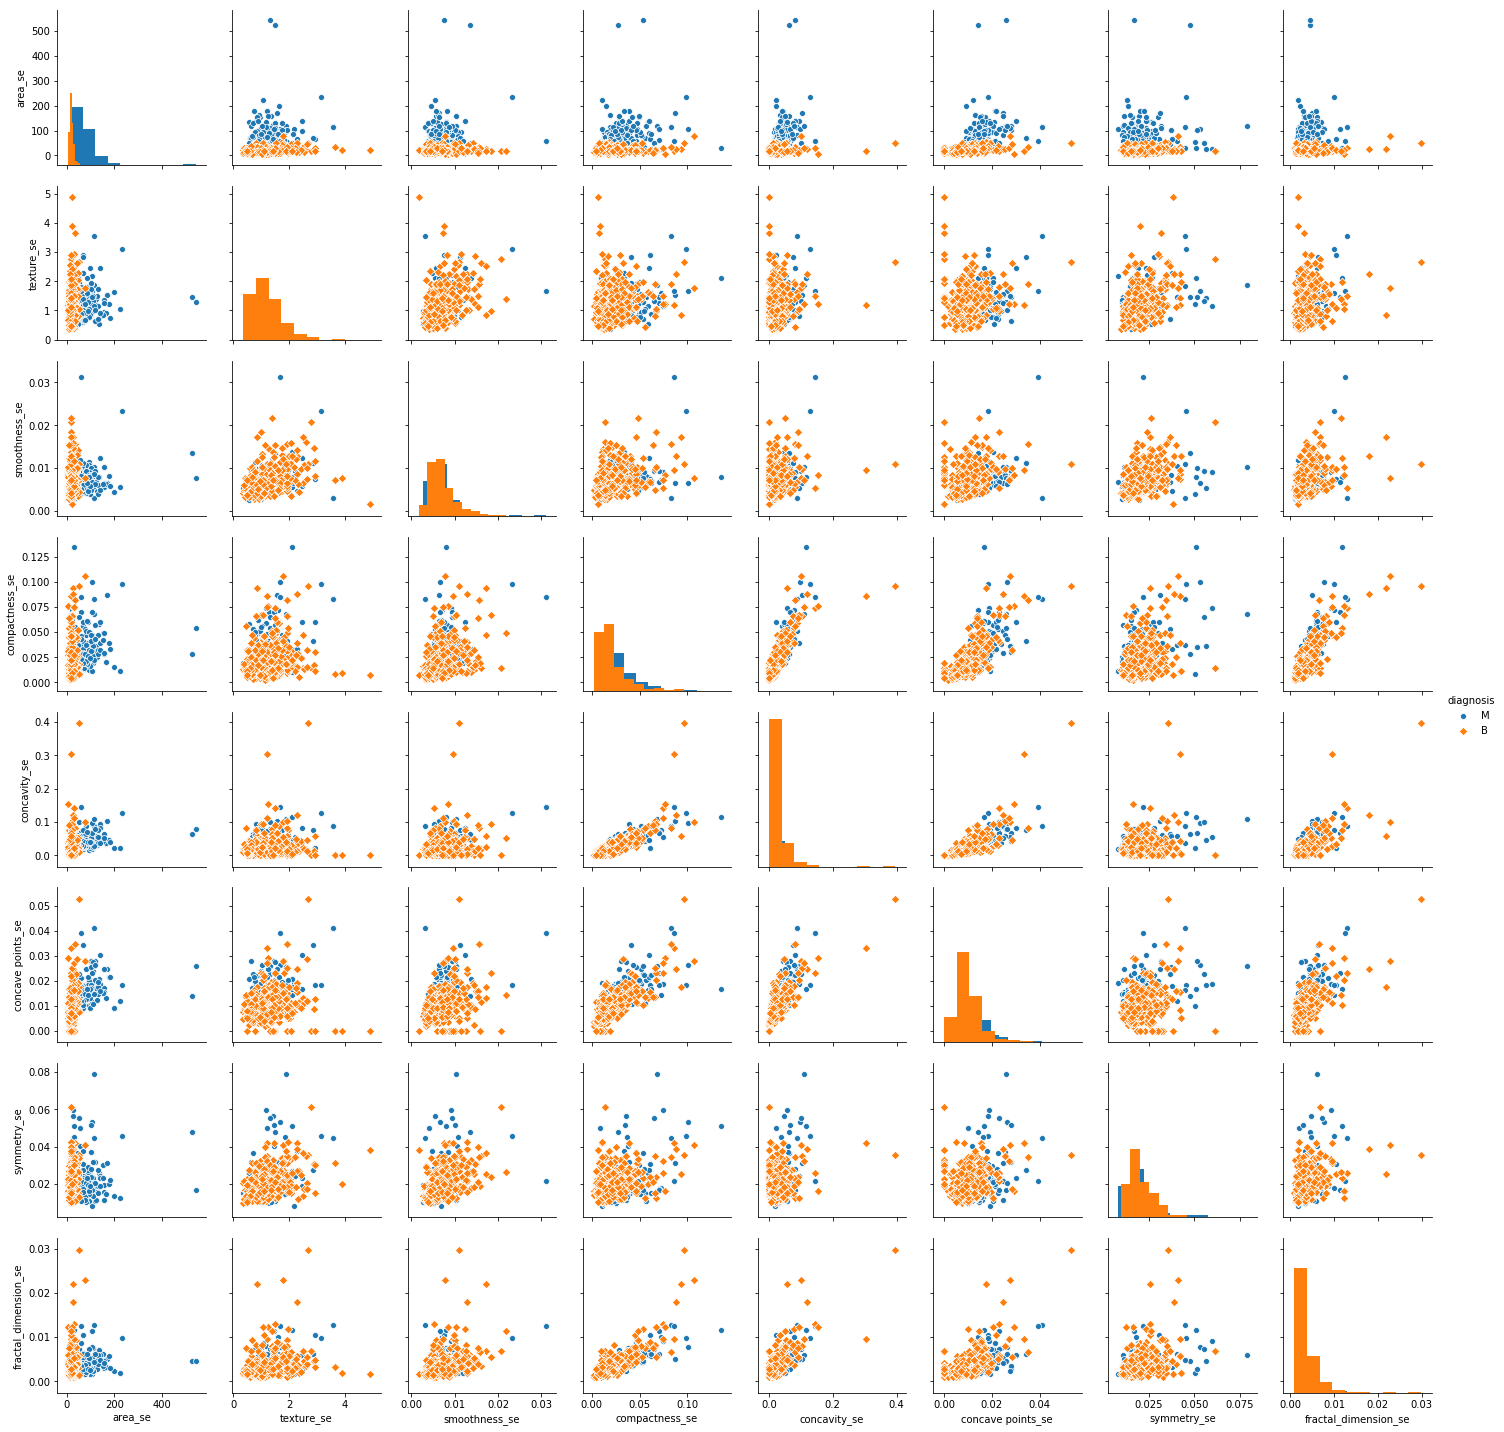

In [12]:
# Mostrar correlação entre classes e atributos 'se'
sns.pairplot(dados, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_se", "texture_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"] ) 
plt.show()


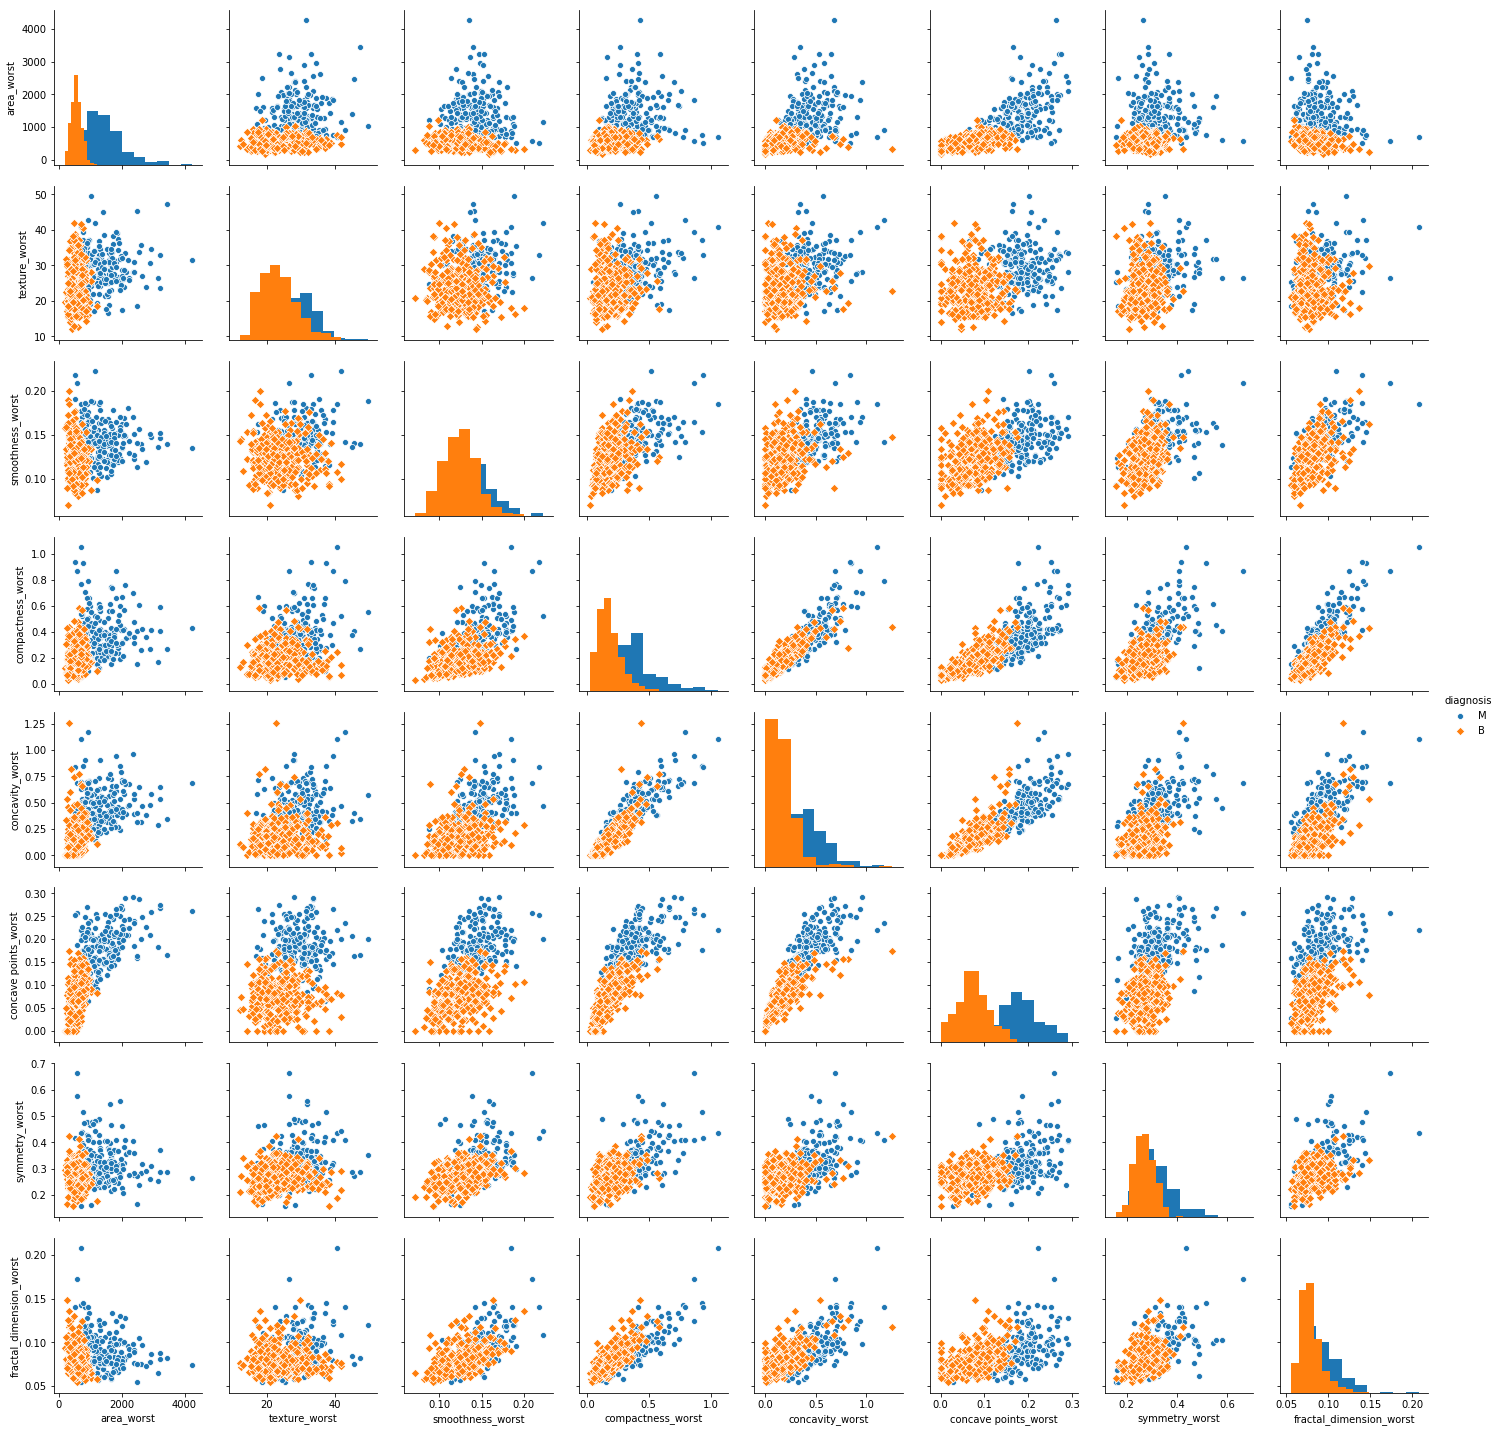

In [13]:
# Mostrar correlação entre classes e atributos 'worst'
sns.pairplot(dados, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_worst", "texture_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst" , "fractal_dimension_worst"] ) 
plt.show()


# Transformação

Transformação é a etapa de armazenamento dos dados de forma a facilitar o uso das técnicas de Data Mining. 

Nessa etapa nos separamos a base de dados em duas partes: 
- Treino : dados que serão usados para treinar o modelo.
- Teste : dados que serão usados para calcular a qualidade do modelo gerado.

In [14]:
# Remoção dos atributos que tinham alta correlação

droplist_final = ['radius_mean', 	'perimeter_mean',	'concavity_mean',	'radius_se', 	'perimeter_se',	'radius_worst',	'perimeter_worst']

data = X.drop(droplist_final, axis = 1)                     #retirada de atributos 


# Separar dados em Treino e Teste 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10) # random_state=10 foi mantido para questão de REPRODUCIBILIDADE. (Separar os dados da mesma forma independente da execução). 

print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ',x_test.shape[0]) #qtd de registros para teste


Quantidade de registros para treino:  426
Quantidade de registros para teste:  143


# Mineração de Dados

*Data mining* é a principal atividade do conhecimento, aplicando, para este fim, algoritmos de descoberta de padrões.
Iremos fazer uso do algoritmo KNN (do inglês,  *K-nearest neighbor*),  que determina a classe(o rótulo de classificação)  de uma amostra baseado nas k amostras vizinhas mais próximas advindas de um conjunto de treinamento.

Para fazer a escolha do K ideal calculamos a acurácia para k de 1 até 15 com *cross validation*.
> ***Cross Validation*** (validação cruzada) é o particionamento do conjunto de dados em subconjuntos mutualmente exclusivos, e posteriormente, utiliza-se alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento) e o restante dos subconjuntos (dados de validação ou de teste) são empregados na validação do modelo.

In [15]:
# Calcular a acurácia para K de 1 a 15 utilizando Cross Validation
tr_acc = []
k_set = range(1,15)

for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  scores = cross_val_score(knn, x_train, y_train, cv=10) #testa eficacia com cross validation na base de treinamento
  tr_acc.append(scores.mean())
  
best_k = np.argmax(tr_acc) #retorna o indice do maior
print('Melhor k no treinamento com Cross Validation: ', k_set[best_k]) #mostra melhor k do treinamento com cross validation

Melhor k no treinamento com Cross Validation:  7


 Depois calculamos a acurácia para  cada k de 1 até 15 aplicando o modelo nos dados de treinamento e fazendo o teste com os dados de teste. 


In [16]:
te_acc = []
k_set = range(1,15)

for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test) #aplica x_test no modelo
  te_acc.append(sklearn.metrics.accuracy_score(y_test, y_pred)) #compara y_test com y_pred
    
melhor_k =np.argmax(te_acc)
print('Melhor k nos testes: ', k_set[melhor_k]) #melhor k do treinamento normal + teste

Melhor k nos testes:  8



A seguir é mostrado um gráfico para comparar a acurácia de cada valor de K no treino e no teste.

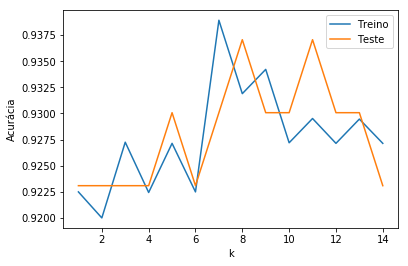

In [17]:
import matplotlib.pyplot as plt

plt.plot(k_set,tr_acc, label='Treino')
plt.plot(k_set,te_acc, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

Assim assumiremos que o melhor K para esse modelo é 7, pois o treino apresenta sua maior acurácia. 

# Avaliação

Como o próprio nome diz, esta fase consiste em interpretar os dados gerados e verificar se possuem alguma validade para o problema proposto.

Iremos apresentar o Score , Acurácia e Tabela de Confusão  do modelo quando aplicado para K = 7. As observações que podemos tirar acerca desses cálculos é:

- Score: podemos perceber que na maioria dos casos o algoritmo possui muita 'certeza' da classificação efetuada.
- Acurácia: o modelo apresenta  cerca de 93% de acurácia.
- Matriz de confusão: no teste do modelo existem 4  casos de falso positivo, ou seja, que foram preditos como benignos quando na verdade eram malignos. E 5 casos de falso positivo , ou seja, que foram preditos como benignos quando na verdade eram malignos. Além dos restantes 134 casos que foram corretamente preditos.


## Cálculo de score

In [18]:
# Reaplicar o modelo com k=7 , que é o melhor k
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(x_train, y_train)


# Mostrar Score
pred_scores = clf.predict_proba(x_test)
print(pred_scores)

[[0.         1.        ]
 [1.         0.        ]
 [0.90909091 0.09090909]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.18181818 0.81818182]
 [0.         1.        ]
 [0.36363636 0.63636364]
 [1.         0.        ]
 [1.         0.        ]
 [0.45454545 0.54545455]
 [0.90909091 0.09090909]
 [0.09090909 0.90909091]
 [0.         1.        ]
 [1.         0.        ]
 [0.90909091 0.09090909]
 [1.         0.        ]
 [0.         1.        ]
 [0.27272727 0.72727273]
 [0.90909091 0.09090909]
 [1.         0.        ]
 [0.90909091 0.09090909]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.81818182 0.18181818]
 [1.         0.        ]
 [0.72727273 0.27272727]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]


## Cálculo da acurácia

In [19]:
# Calcular a acurácia do modelo aplicado nos dados de teste
y_pred = clf.predict(x_test)
te_acc= (sklearn.metrics.accuracy_score(y_test, y_pred)) 
print ('Acurácia obtida: ', te_acc)

Acurácia obtida:  0.9370629370629371


## Matriz de confusão 


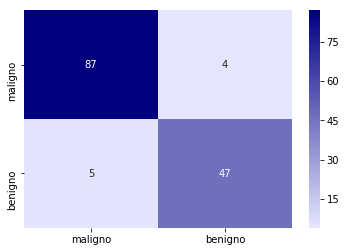

In [20]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['maligno', 'benigno']],
                  columns = [i for i in ['maligno', 'benigno']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_cm, annot=True, cmap=cmap)

# Conclusão

Realizamos todas as etapas do KDD  (Seleção dos dados, Pré-processamento, Transformação, Mineração de Dados, Avaliação) na abordagem do algoritmo de aprendizado de máquina KNN aplicado na base de dados referente ao diagnóstico de câncer de mama. 

É possível concluir que a acurácia de 93% obtida pelo modelo  é satisfatória. 

Numa próxima abordagem poderiam ser definidos quais são os atributos mais relevantes para a separação das classes a fim de atribuir um peso maior a esses atributos no momento da classificação de um novo dado. Atributos que seriam candidatos a um peso maior são os que foram comentados na seção da Plotagem de violino (area_mean ,  concave points_mean , area_se , concave points_worst e area_worst )  e na seção de Gráfico de pares de atributos (area_mean ,  concave points_mean , area_se , concave points_worst e area_worst ).
